# Applied Statistics Assessment

In [273]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math as math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

## Problem 1: Extending the Lady Tasting Tea

The original *Lady Tasting Tea* experiment was first described by Ronald Fisher in his book *The Design of Experiments* (1935) [Wikipedia](https://en.wikipedia.org/wiki/The_Design_of_Experiments).  
The purpose of the experiment was to test a woman’s claim that she could determine whether milk had been poured into a cup before or after the tea, simply by taste.

In the original setup, there were eight cups in total, four with milk poured first and four with tea poured first.  
The woman was asked to identify which cups were prepared by each method. Fisher calculated that there was roughly a 1 in 70 chance of correctly identifying all four milk-first cups purely by guessing.


In this problem, the *Lady tasting tea* experiment will be slightly modified to 12 cups: 8 tea-first and 4 milk-first. The experiemnt will be simulated using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. The results will then be compared to the original 8-cup experiment.

### Cups of Tea(12-Cup experiment)

The Lady Tasting Tea experiment to 12 cups: 8 tea-first and 4 milk-first.
To start, the number of ways to select the 4 milk-first cups from the 12 total cups will be calculated.

In [274]:
# Number of cups in total
no_cups = 12

# Number of milk-first cups
no_cups_milk_first = 4

# Number of tea-first cups
no_cups_tea_first = 8

In [275]:
# Number of ways of selecting 4 milk-first cups from 12
ways = math.comb(no_cups, no_cups_milk_first)
print(f"There are {ways} ways of selecting 4 milk-first cups from 12.")

There are 495 ways of selecting 4 milk-first cups from 12.


Label the twelve cups: 1 2 3 4 5 6 7 8 9 10 11 12.  

We select four cups to have milk first.  
For example, cups 2, 5, 8, and 12 might be chosen.  

Visualizing placeholders for the milk-first cups:

Cups: 1 2 3 4 5 6 7 8 9 10 11 12  
Placeholders: _ _ _ _

In [276]:
# Total number of ways of selecting four cups in order
ways_ordered = 12 * 11 * 10 * 9
ways_ordered

11880

In [277]:
# Number of ways of shuffling the 4 selected cups
no_shuffles = 4 * 3 * 2 * 1
no_shuffles

24

In [278]:
# Number of combinations ignoring order
no_combs = ways_ordered // no_shuffles
no_combs

495

Formula

In mathematics, the math.comb() function is called the choose function.

It is written and calculated as

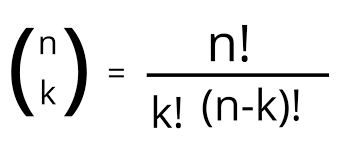

In [279]:


# Number of cups of tea in total.
n = 12



In [280]:


# Number of cups of tea with milk in first.
k = 4




math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as n!.

Multiply all positive integers from n down to 1.

n! = n x (n - 1) x (n - 2) x ... x 1

e.g. 5! = 5 x 4 x 3 x 2 x 1 = 120


In [281]:
# Twelve factorial.
math.factorial(n)

479001600

In [282]:
# Four factorial.
math.factorial(k)

24

In [283]:
# Four factorial.
math.factorial(n - k)

40320

In [284]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1
k! = 4 x 3 x 2 x 1
(n - k)! = 4 x 3 x 2 x 1
n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (4 x 3 x 2 x 1) = 12 x 11 x 10 x 9

### Explanation

We’re using the **combination formula** to find how many ways we can choose 4 milk-first cups from 12 total cups:

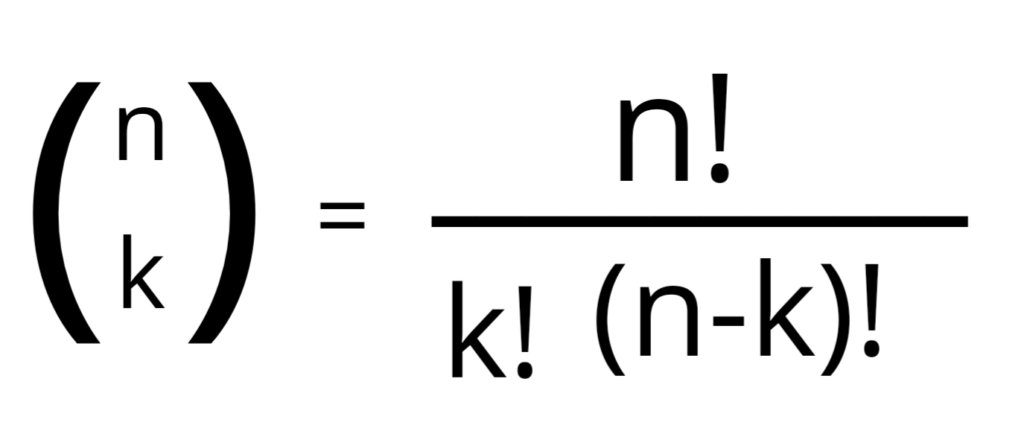


\[
\binom{n}{k} = \frac{n!}{k! (n - k)!}
\]

---

1. **Expand the factorials**

   - \( n! \) (12 factorial) means multiply all numbers from 12 down to 1.  
     This represents all possible arrangements of 12 cups.

     \[
     n! = 12 × 11 × 10 × 9 × 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1
     \]

   - \( k! \) (4 factorial) is the number of ways to arrange the 4 milk-first cups.

     \[
     k! = 4 × 3 × 2 × 1
     \]

   - \( (n - k)! \) (8 factorial) is the number of ways to arrange the remaining 8 tea-first cups.

     \[
     (n - k)! = 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1
     \]

---

2. **Cancel out the common terms**

   When dividing \( n! \) by \( (n - k)! \), everything from 8 down to 1 cancels out, leaving only:

   \[
   \frac{n!}{(n - k)!} = 12 × 11 × 10 × 9
   \]

   This step shows the number of ways to choose 4 cups in order.

---

3. **Divide by \( k! \)**

   Because order doesn’t matter (we only care which 4 are milk-first, not the order we picked them),  
   we divide by \( k! \):

   \[
   C(12, 4) = \frac{12 × 11 × 10 × 9}{4 × 3 × 2 × 1} = \frac{11880}{24} = 495
   \]

   So there are **495 possible combinations** of 4 milk-first cups among 12.

---

4. **Find the probability of guessing all correctly**

   If the participant guesses randomly, only **1** of those 495 possible arrangements is correct.

   \[
   P= 1/495 ≈ 0.00202
   \]

   That’s about **0.2%**, meaning there’s only a 1 in 495 chance of getting them all right by luck.


In [285]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [286]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [287]:
# Number of combinations.
len(combs)

495

In [288]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[3, 9, 10, 11]

In [289]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{3, 9, 10, 11}

In [290]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {3}
(0, 1, 2, 4) 0 set()
(0, 1, 2, 5) 0 set()
(0, 1, 2, 6) 0 set()
(0, 1, 2, 7) 0 set()
(0, 1, 2, 8) 0 set()
(0, 1, 2, 9) 1 {9}
(0, 1, 2, 10) 1 {10}
(0, 1, 2, 11) 1 {11}
(0, 1, 3, 4) 1 {3}
(0, 1, 3, 5) 1 {3}
(0, 1, 3, 6) 1 {3}
(0, 1, 3, 7) 1 {3}
(0, 1, 3, 8) 1 {3}
(0, 1, 3, 9) 2 {9, 3}
(0, 1, 3, 10) 2 {10, 3}
(0, 1, 3, 11) 2 {3, 11}
(0, 1, 4, 5) 0 set()
(0, 1, 4, 6) 0 set()
(0, 1, 4, 7) 0 set()
(0, 1, 4, 8) 0 set()
(0, 1, 4, 9) 1 {9}
(0, 1, 4, 10) 1 {10}
(0, 1, 4, 11) 1 {11}
(0, 1, 5, 6) 0 set()
(0, 1, 5, 7) 0 set()
(0, 1, 5, 8) 0 set()
(0, 1, 5, 9) 1 {9}
(0, 1, 5, 10) 1 {10}
(0, 1, 5, 11) 1 {11}
(0, 1, 6, 7) 0 set()
(0, 1, 6, 8) 0 set()
(0, 1, 6, 9) 1 {9}
(0, 1, 6, 10) 1 {10}
(0, 1, 6, 11) 1 {11}
(0, 1, 7, 8) 0 set()
(0, 1, 7, 9) 1 {9}
(0, 1, 7, 10) 1 {10}
(0, 1, 7, 11) 1 {11}
(0, 1, 8, 9) 1 {9}
(0, 1, 8, 10) 1 {10}
(0, 1, 8, 11) 1 {11}
(0, 1, 9, 10) 2 {9, 10}
(0, 1, 9, 11) 2 {9, 11}
(0, 1, 10, 11) 2 {10, 11}
(0, 2, 3, 4) 1 {3}
(0, 2, 3, 5) 1 {3}
(0, 2, 3, 6) 1 {3}
(0, 

In [291]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

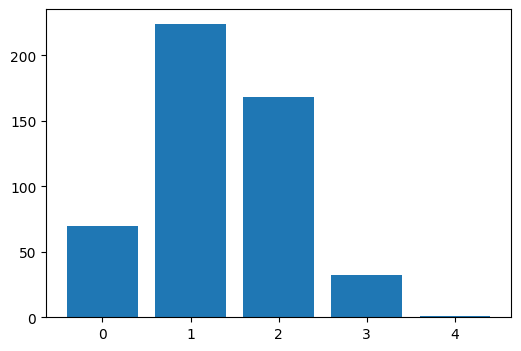

In [292]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);